<a href="https://colab.research.google.com/github/TusharRGore/Unsupervised_ML_Netflix_Clustering/blob/main/Unsupervised_ML_Netflix_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
333,s334,TV Show,Against the Tide,NaN,"Christopher Lee, Rui En, Desmond Tan, Zheng Ge...",Singapore,"July 1, 2017",2014,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A detective and a psychologist investigating a...
5573,s5574,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",2007,UR,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow..."
1189,s1190,TV Show,Camp X,NaN,NaN,Canada,"February 1, 2019",2014,TV-MA,1 Season,Docuseries,"Established during World War II, North America..."
2324,s2325,Movie,G.O.R.A,Ömer Faruk Sorak,"Cem Yılmaz, Rasim Öztekin, Özkan Uğur, İdil Fı...",Turkey,"March 10, 2017",2004,TV-MA,123 min,"Action & Adventure, Comedies, International Mo...",Carpet dealer and UFO photo forger Arif is abd...
5836,s5837,TV Show,Stranger Things,NaN,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",United States,"July 4, 2019",2019,TV-14,3 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","When a young boy vanishes, a small town uncove..."


In [ ]:
data.shape

(7787, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
plt_na=data.isna()
plt_na.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

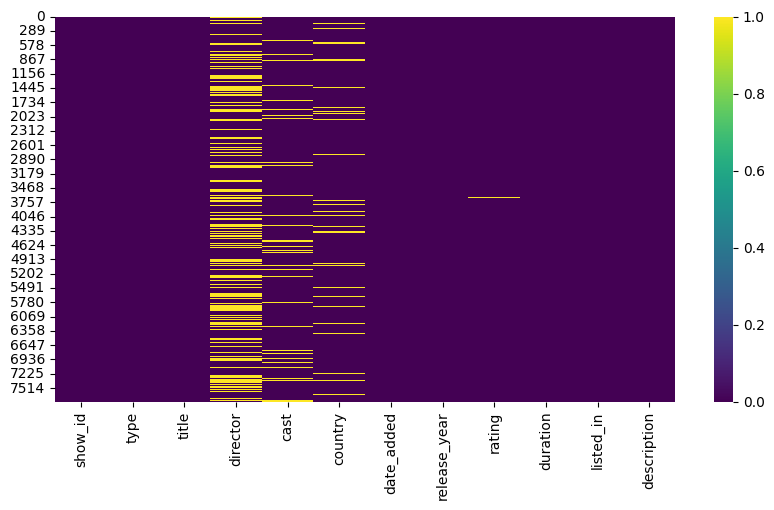

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(plt_na,cmap='viridis')

In [ ]:
#drop Director column since it have way too many nan values
data.drop('director',axis=1,inplace=True)

In [ ]:
data.drop('cast',axis=1,inplace=True)

In [ ]:
#check for date_added_nan
data_added_nan=data[data['date_added'].isna()]
data_added_nan

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
data_added_nan.shape

(10, 10)

In [ ]:
data.dropna(subset=['date_added'],inplace=True)

In [ ]:
data.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [ ]:
data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
movies_by_year=data[data.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
shows_by_year=data[data.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content_by_year=data['release_year'].value_counts().sort_index(ascending=False).head(15)


In [ ]:
movies_by_year

release_year
2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    157
2014     90
2013     64
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
Name: count, dtype: int64

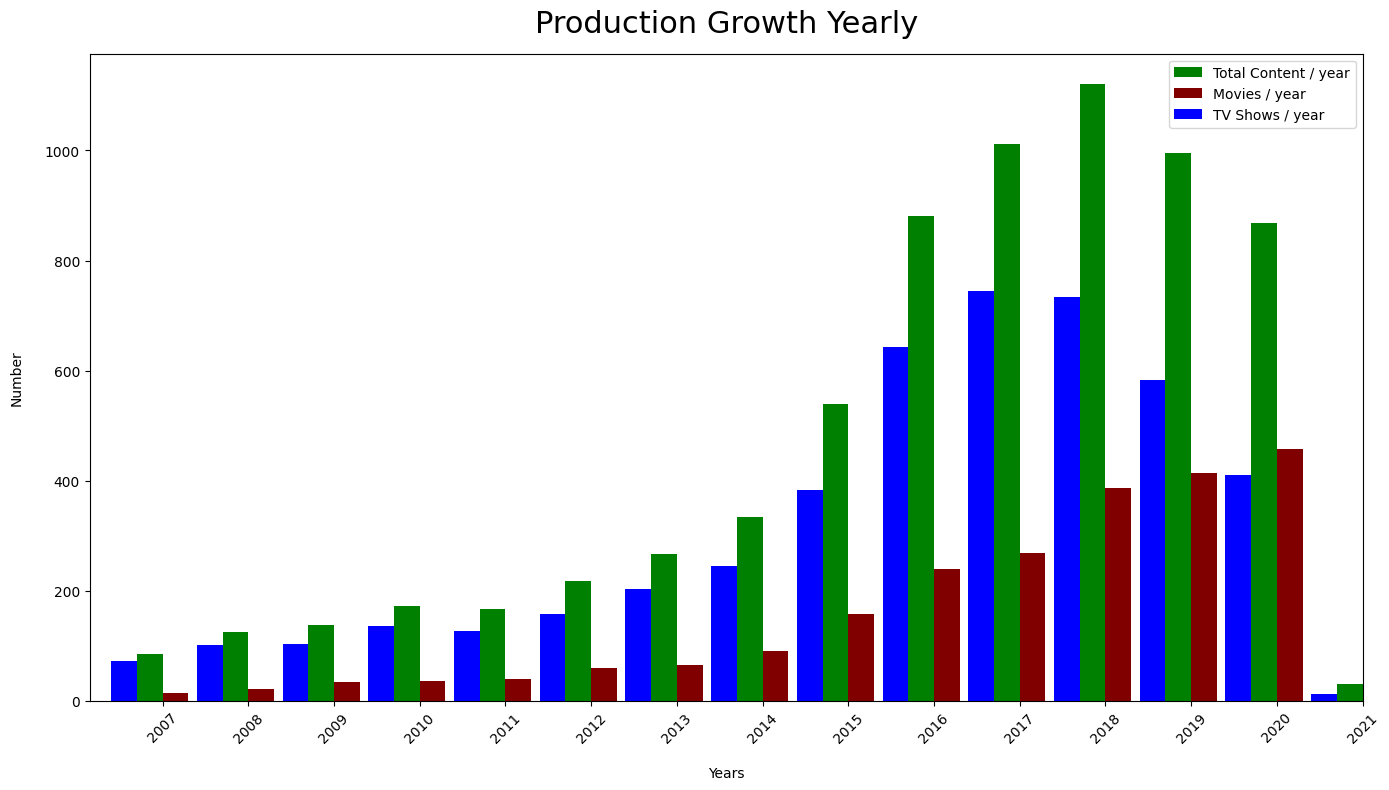

In [ ]:
total_content_sorted = total_content_by_year.sort_index(ascending=True)
yearly_movies_sorted = movies_by_year.sort_index(ascending=True)
yearly_shows_sorted =shows_by_year.sort_index(ascending=True)

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bar plot for total content, movies, and TV shows
total_content_sorted.plot(kind='bar', width=0.3, position=1, color='green', label="Total Content / year", ax=ax)
yearly_movies_sorted.plot(kind='bar', width=0.3, position=0, color='maroon', label="Movies / year", ax=ax)
yearly_shows_sorted.plot(kind='bar', width=0.3, position=2, color='blue', label="TV Shows / year", ax=ax)

# Customizing the plot
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#Check release year
data['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

<Axes: ylabel='release_year'>

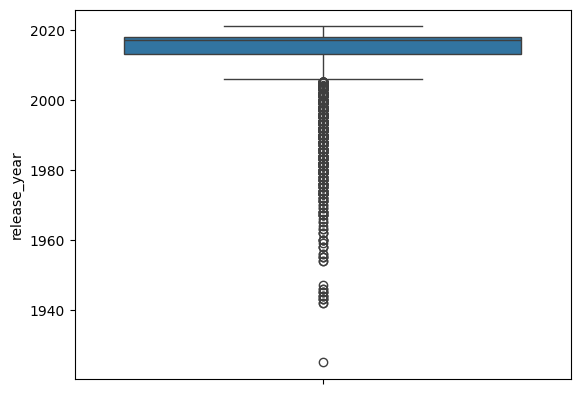

In [ ]:
sns.boxplot(data['release_year'])

In [ ]:
q1=data['release_year'].quantile(0.25)
q3=data['release_year'].quantile(0.75)
iqr=q3-q1
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: 2013.0
Q3: 2018.0
IQR: 5.0


In [ ]:
release_year_outlier=data[(data['release_year']<q1-1.5*iqr)|(data['release_year']>q3+1.5*iqr)]
release_year_outlier

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [ ]:
#2009 is 15 percent
data["release_year"] = np.where(data["release_year"] <2009, data.release_year.mean(),data['release_year'])

In [ ]:
data.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: ylabel='release_year'>

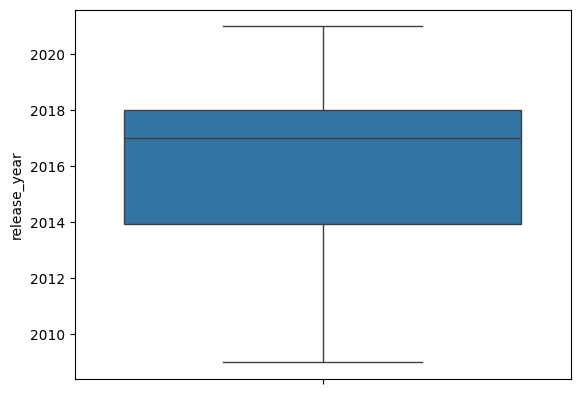

In [ ]:
sns.boxplot(data['release_year'])

Title

In [ ]:
data.title.nunique()

7777

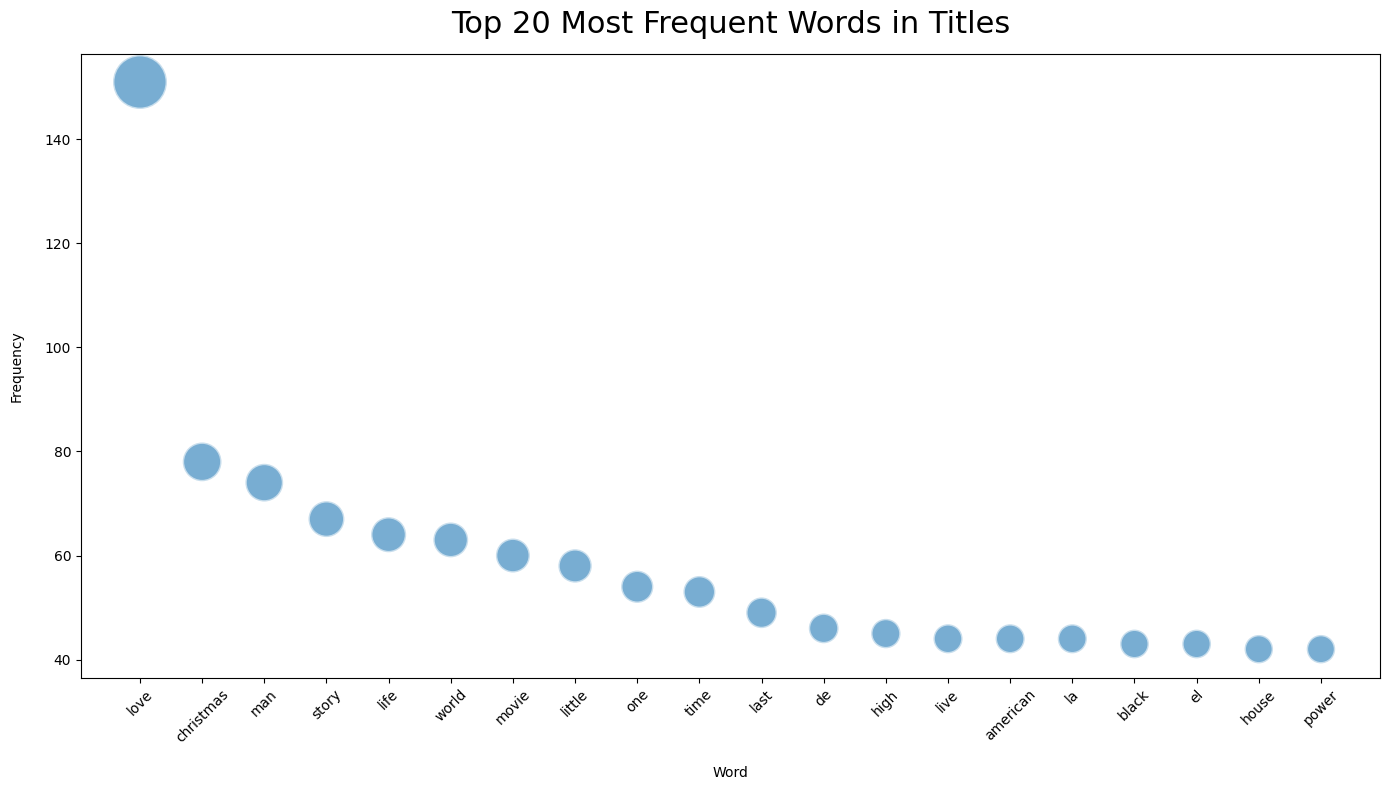

In [ ]:
from collections import Counter
from wordcloud import STOPWORDS
import string

# Assuming 'df' is your DataFrame and 'title' is the column with titles
data_wordcloud = data['title']
text = " ".join(word for word in data_wordcloud)

# Create a stopword list and preprocess the text
stopwords = set(STOPWORDS)
table = str.maketrans('', '', string.punctuation)
words = text.lower().translate(table).split()
filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(14, 8))
plt.scatter(word_freq_df['Word'], word_freq_df['Frequency'], s=word_freq_df['Frequency']*10, alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Word', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Top 20 Most Frequent Words in Titles', y=1.02, fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Christmas , Love ,Man , Story are popular words in the Title. Romantic genre is dominating in the title

Countries

In [ ]:
data.country.nunique()

681

In [ ]:
data.country.value_counts()

country
United States                                                   2549
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [ ]:
data.country.isna().sum()

506

In [ ]:
data.country.mode()[0]

'United States'

In [ ]:
data.country.fillna(data.country.mode()[0],inplace=True)

In [ ]:
data.country.isna().sum()

0

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.type.value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

In [ ]:
country_counts = data['country'].value_counts().head(20)
country_counts

country
United States                    3055
India                             923
United Kingdom                    396
Japan                             225
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          82
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: count, dtype: int64

In [ ]:
# Split countries where multiple countries are listed
data = data.assign(country=data['country'].str.split(', ')).explode('country')

In [ ]:

# Count the number of productions per country for movies
country_movie_counts = data[data['type'] == 'Movie']['country'].value_counts().reset_index()
country_movie_counts.columns = ['Country', 'Movie']


In [ ]:
# Count the number of productions per country for movies
country_tvshow_counts = data[data['type'] == 'TV Show']['country'].value_counts().reset_index()
country_tvshow_counts.columns = ['Country', 'TV Show']

In [ ]:
# Merge the counts into a single DataFrame
country_counts = pd.merge(country_movie_counts, country_tvshow_counts, on='Country', how='outer').fillna(0)

In [ ]:
# Take the top 20 countries based on the total number of productions
country_counts['Total'] = country_counts['Movie'] + country_counts['TV Show']
country_counts = country_counts.sort_values(by='Total', ascending=False).head(5)

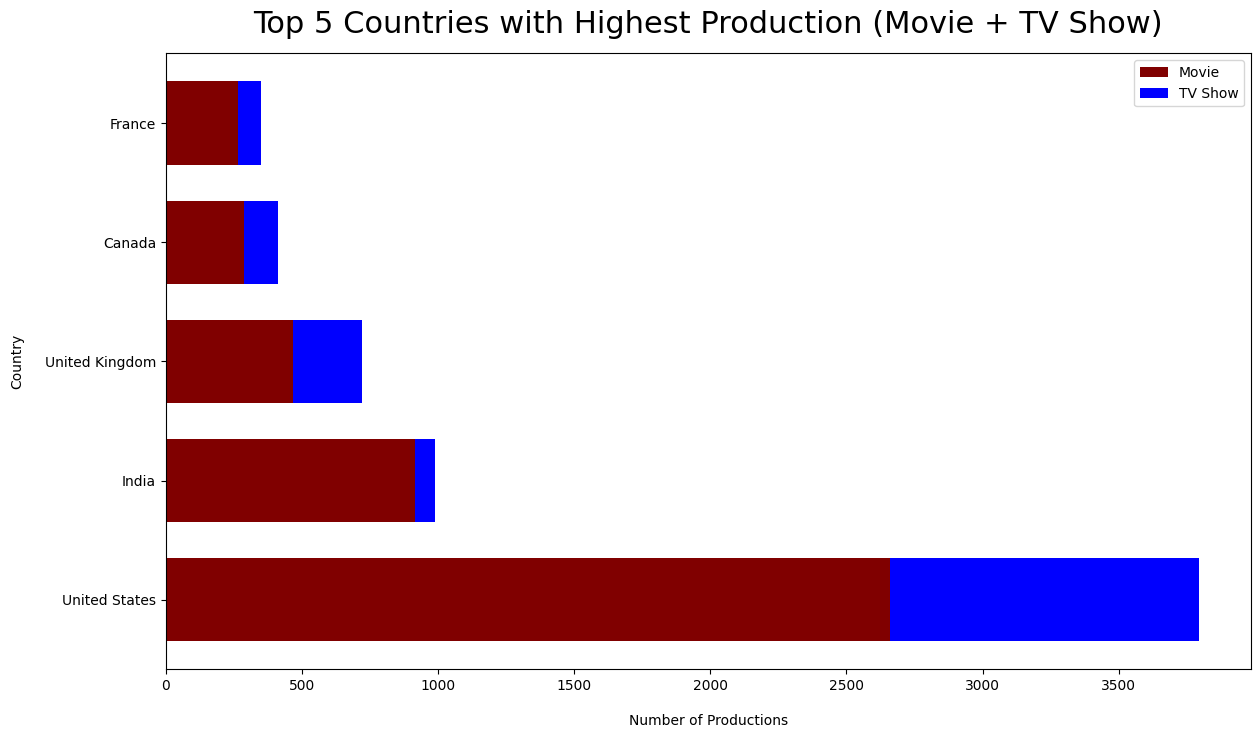

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Creating the stacked bar chart
bar_width = 0.7
p1 = plt.barh(country_counts['Country'], country_counts['Movie'], color='maroon', label='Movie', height=bar_width)
p2 = plt.barh(country_counts['Country'], country_counts['TV Show'], color='blue', left=country_counts['Movie'], label='TV Show', height=bar_width)

plt.xlabel('Number of Productions', labelpad=15)
plt.ylabel('Country', labelpad=15)
plt.title('Top 5 Countries with Highest Production (Movie + TV Show)', y=1.02, fontsize=22)
plt.legend()

plt.show()

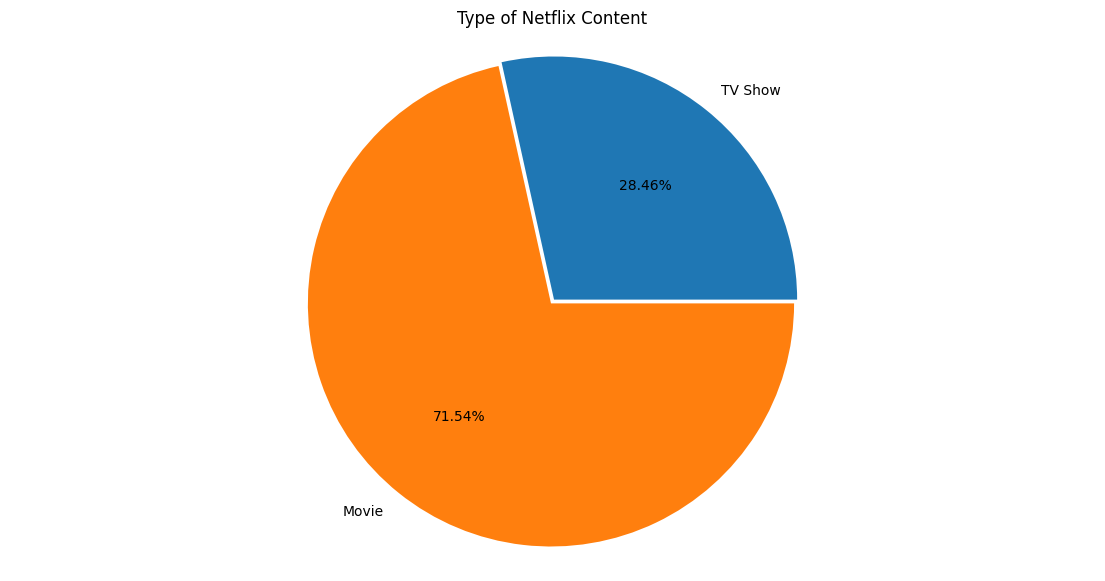

In [ ]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=0)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Nearly 3/4 of content is Movies whereas 1/4 is TV Show

Check Ratings

In [ ]:
data.rating.value_counts()

rating
TV-MA       3350
TV-14       2166
R           1021
TV-PG        926
PG-13        610
PG           369
TV-Y7        363
TV-Y         340
TV-G         217
NR           113
G             58
TV-Y7-FV       8
UR             7
NC-17          5
Name: count, dtype: int64

In [ ]:
rating_counts = data['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts.sort_values(by='Count')


,Rating,Count
13,NC-17,5
12,UR,7
11,TV-Y7-FV,8
10,G,58
9,NR,113
8,TV-G,217
7,TV-Y,340
6,TV-Y7,363
5,PG,369
4,PG-13,610


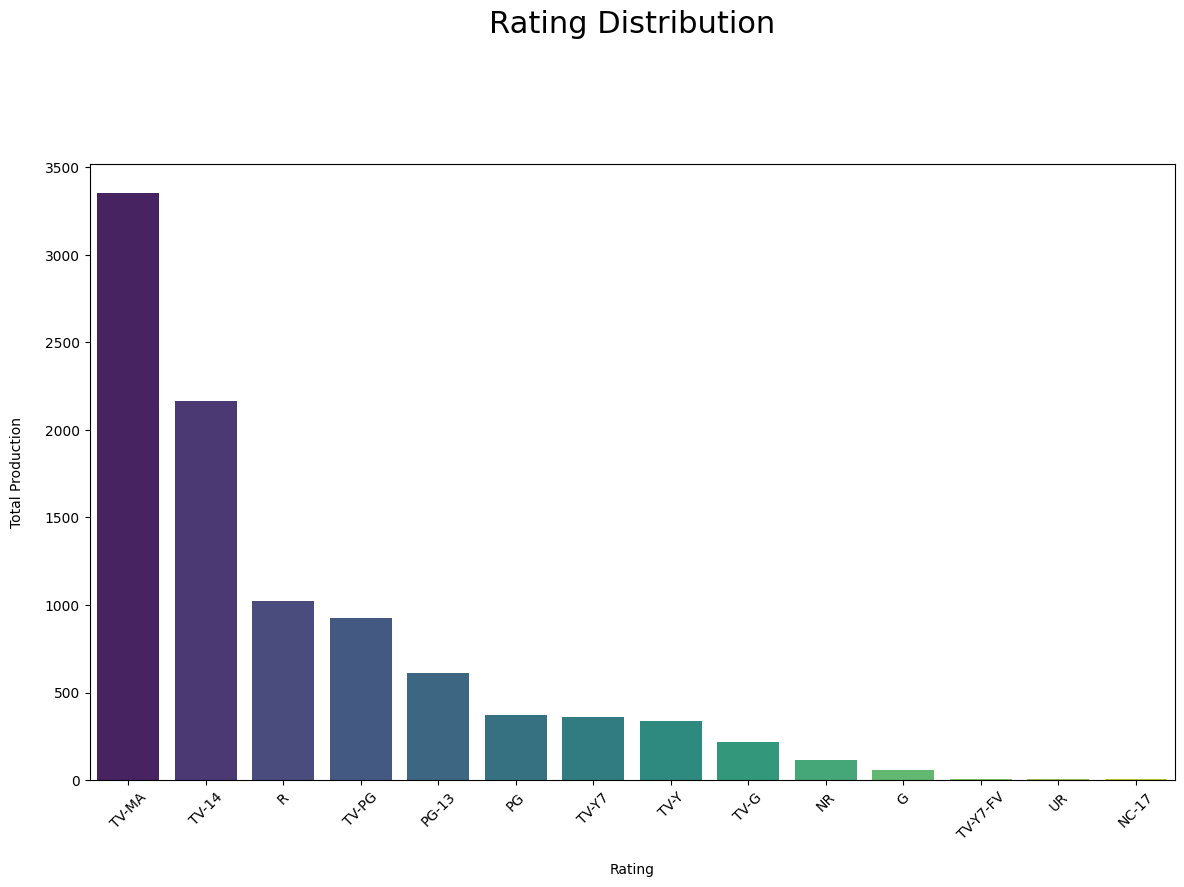

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Rating',y='Count',data=rating_counts,palette='viridis')
plt.xlabel('Rating',labelpad=15)
plt.ylabel('Total Production',labelpad=15)
plt.title('Rating Distribution',y=1.2,fontsize=22)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.duration.value_counts()

duration
1 Season     1781
2 Seasons     440
3 Seasons     222
93 min        186
90 min        176
             ... 
214 min         1
182 min         1
224 min         1
233 min         1
191 min         1
Name: count, Length: 216, dtype: int64

Median Episode runtime is 55 mins

On avg 5 episodes are in a season on Netflix

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins



In [ ]:
convert_seasons_to_min("4 Seasons")

1100

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  data['duration'] = data.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in data.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  data.duration = time_list

In [ ]:
data.duration.value_counts().to_frame().T

duration,275.0,550.0,825.0,1100.0,1375.0,1650.0,1925.0,2200.0,2750.0,2475.0,3300.0,4125.0,3025.0,3575.0,4400.0
count,1781,440,222,109,68,33,22,19,9,8,3,3,2,1,1


In [ ]:

data['type'].value_counts()

type
Movie      6839
TV Show    2721
Name: count, dtype: int64

<Axes: xlabel='duration_in_minutes', ylabel='Density'>

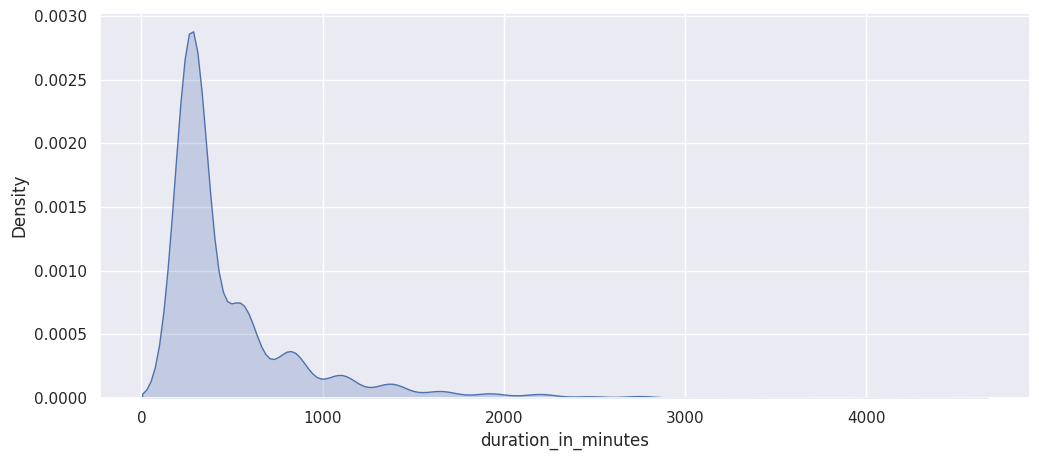

In [ ]:

sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = data.duration_in_minutes[data['type'] == 'TV Show'] , shade=True)

<Axes: xlabel='duration_in_minutes', ylabel='Density'>

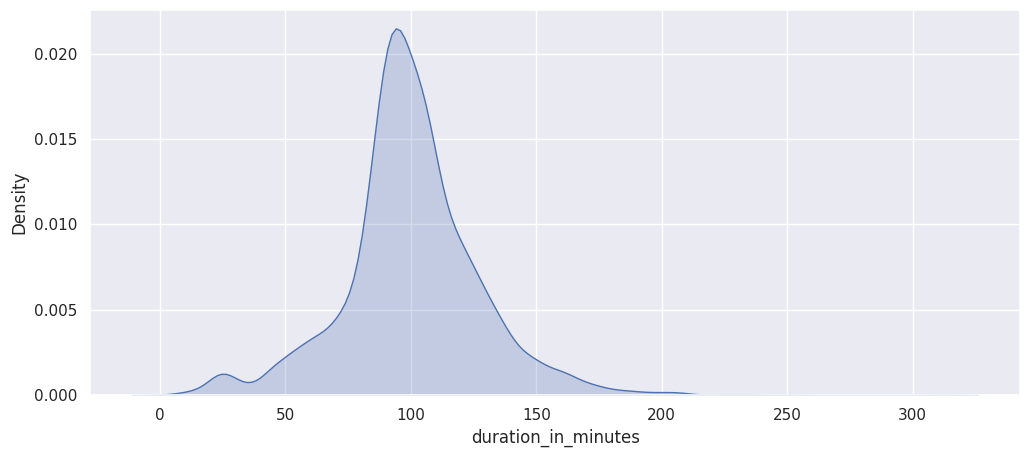

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = data.duration_in_minutes[data['type'] == 'Movie'] , shade=True)

In [ ]:
data.drop(columns=['duration'], inplace=True)

Creating Categories

In [ ]:
categories = ", ".join(data['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

20921

In [ ]:
len(set(categories))

42

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 29),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('TV Thrillers', 58)]

In [ ]:
#Top 5 least occured category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 29),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('TV Thrillers', 58),
 ('Teen TV Shows', 60)]

In [ ]:
#Top 5 most occured category
sorted_category_wise_count[-5:]

[('Documentaries', 1022),
 ('International TV Shows', 1302),
 ('Comedies', 1746),
 ('Dramas', 2757),
 ('International Movies', 3122)]

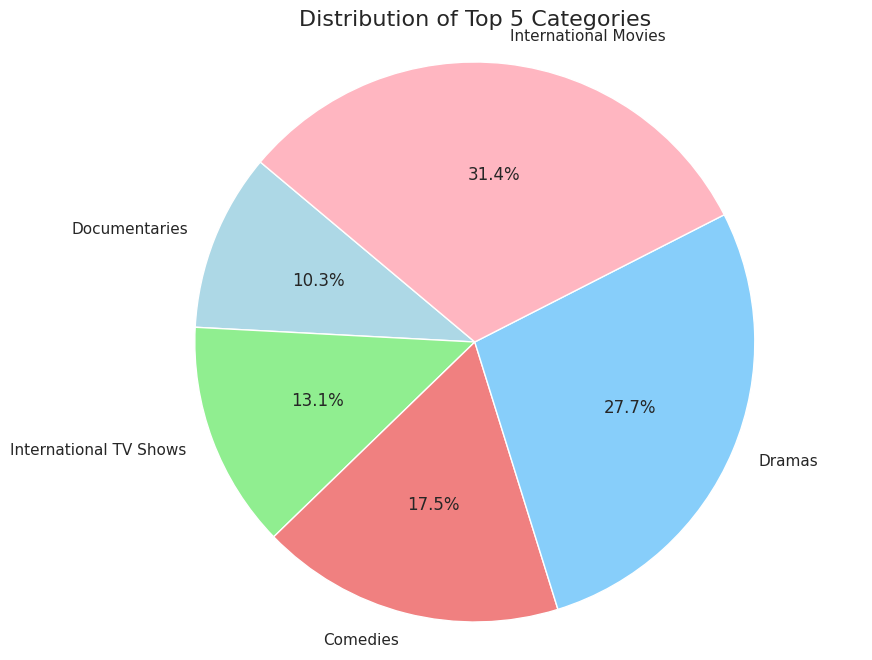

In [ ]:
top_5_categories = sorted_category_wise_count[-5:]
categories = [item[0] for item in top_5_categories]
counts = [item[1] for item in top_5_categories]

# Colors for the pie chart slices
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Categories', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# new column total_category

type(data.listed_in.iloc[0])

str

In [ ]:
(data.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(data.listed_in.iloc[0]).split(",")


['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:

no_of_category = []
for categories in data.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:

data['no_of_category'] = no_of_category

In [ ]:

data[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


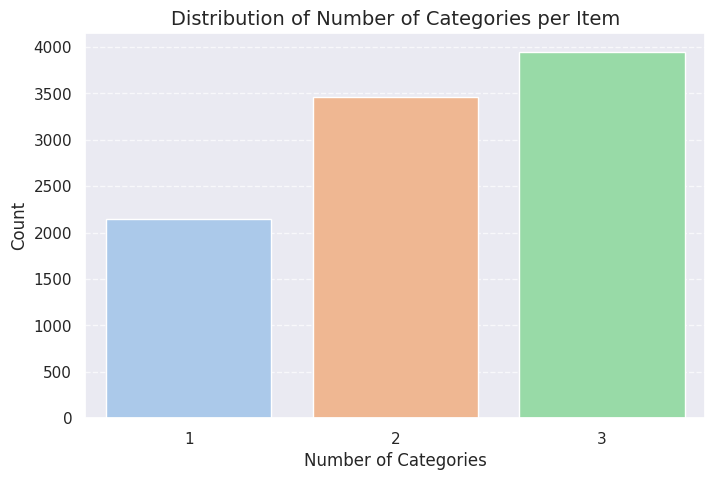

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=no_of_category, palette='pastel')
plt.xlabel('Number of Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Categories per Item', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines on y-axis

plt.show()